# Datasets

In [1]:
%matplotlib inline

## Example: Fisher's Iris Data

For introducing the different supervised learners we will use the IRIS data set.

The iris data set characterises iris-flowers into three sub-groups according to length and width of the outer (petal) and inner (sepal) leaves of a flower.

**Sepal vs. Petal**


<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/220px-Petal-sepal.jpg"/>

**The three classes (setosa, versicolor, virginica)**

<div class ="img-responsive" style="display:inline" >
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="30%"/>
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg" width="30%"/>
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg" width="30%"  height="10%" style="overflow:hidden"/>
</div>


Images from Wikipedia



In [2]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print ("Classes:", np.unique(iris.target))
print (iris["DESCR"])

Classes: [0 1 2]
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribut

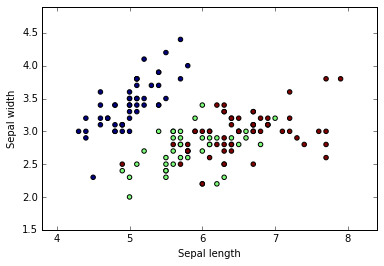

In [4]:
import matplotlib.pyplot as plt

X = iris.data
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure()    # initialize new figure
plt.clf()       # clear canvas

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

In [13]:
# means ...
X.mean(0)    # over samples (axis 0, i.e. rows), not features (axis 1, i.e. columns)

array([ 5.84333333,  3.054     ,  3.75866667,  1.19866667])

In [14]:
# ... and standard deviation
X.std(0)

array([ 0.82530129,  0.43214658,  1.75852918,  0.76061262])

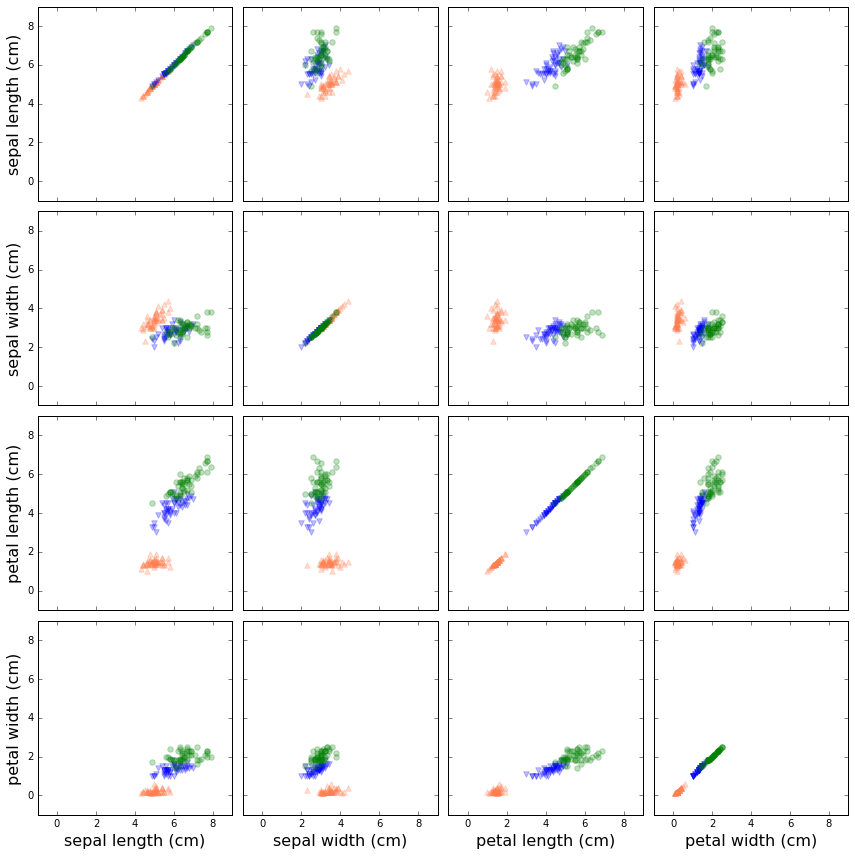

In [23]:
# Let's have a look at all (pairwise) correlations

N = X.shape[1]
n_clusters = 3

y_pred = Y

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[n, m].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(Y != y_pred):
            axes[n, m].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
            
            
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()

# Big Picture

**Example**

Lets assume we have collected a data set about cars:

|Customer Group| Model | Mileage | Power | Price |
|-|-|-|-|-|
|Family| Renault Scienic | 50,000 | 132 | 5,000|
|Upper Class | Porsche Carrera | 10,000 | 332 | 50,000|
|Family | Touran  | 80,000 | 90 | 15,000|
| ... | ... | ... | ... | ... |
|?| Wonder Car| 500 | 4000 | ?|

- Given a large set of cars, can we group together cars with similar price, power and mileage?
- Can we predict the price of a new car given mileage and power?
- Can we predict the customer group?
- What kind of cars do upper class people drive?

#### Real World Applications

- Image Analysis: Face Recognition, Object Detection, Self-driving Cars
- Text Analysis: POS Tagging, Named Entity Recognition, Speech-to-Text Analysis
- Robotics
- E-Commerce
- Information Retrieval and Recommender Systems
- $\ldots$


### General Approach

The usual machine learning setup is:

1. **$n$ data samples** (e.g. $n$ cars), representing the past experience
2. Every data sample is described by a **set of d features/attributes** (e.g. horsepower and price of the car)

|$Attribut_1$|$Attribut_2$|$\ldots$|$Attribut_d$|
|-|-|-|-|
|$Attribut_1$ of $Example_1$|$Attribut_2$ of $Example_1$ |$\ldots$|$Attribut_d$ of $Example_1$|
|$Attribut_1$ of $Example_2$|$Attribut_2$ of $Example_2$ |$\ldots$|$Attribut_d$ of $Example_2$|
|$\ldots$|$\ldots$|$\ldots$|$\ldots$|
|$Attribut_d$ of $Example_n$|$Attribut_2$ of $Example_n$ |$\ldots$|$Attribut_d$ of $Example_n$|



Machine learning estimates a **model** (also called hypothesis) that **'best' fits the data**. Fitting means the model

1. **predicts** features of yet unkown examples (e.g. predict the class a flower belongs to)
2. **describes** properties of the examples (e.g. points belonging togehter)

Building such a model is called learning, training or model fitting.

Using such a model is often call "testing", "model estimation" or "inference step".

Converting data into the necessary format for learning and testing is called **preprocessing**

### Preprocessing

Refers to the task to create and prepare the data to be consumed by the learning algorithm. Usually, the target format is an matrix holding the preprocessed data. Sklearn uses numpy for representing data.


Preprocessing steps can be summarized as follows:

1. **Feature Extraction/Integration**: Convert data into matrix or integrate different data sources into one matrix
2. **Feature Manipulation**: Manipulate and reorganise the features of a matrix
    * *Feature Weighting/Scaling*: Convert the range of feature values
    * *Feature Selection*: Removing unnecessary or low quality features
    * *Feature Transformation (Dimensionality Reduction)*: merge or combine existing features to create new features   
    
3. **Dataset Manipulation**: Manipulate/eliminate data points
    * *Subsampling*: Reduce the amount of data points in case the data set is to large (Squashing)
    * *Outlier Detection*: Remove data sets that do not fit to the data distribution
             
<p>
<div class="alert alert-info">
**Feature Engineering**, the task of creating features from real world data, is the most important and time consuming step (when you apply machine learning techniques)
</div>

See http://scikit-learn.org/stable/data_transforms.html for details on preprocessing.

### Loading/Creating Datasets

The `sklearn` module offers functions to
- use the built-in (small) datasets
- import (large) datasets from online databases
- load your own datasets (in various formats, in particular `svm_light`)
- generate your own artifical data

### Load Pre-Packaged Dataset: Boston Housing Prices

In [30]:
from sklearn import datasets
boston = datasets.load_boston()

data, target = boston.data, boston.target

In [31]:
print("Data Shape:", boston.data.shape)
print("Features:", boston.feature_names)
print("Labels:", boston.target.shape)

Data Shape: (506, 13)
Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Labels: (506,)


Data contains 14 columns. All columns description you can find below.

* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per $ 10,000
* PTRATIO pupil-teacher ratio by town


B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT  lower status of the population
From data set description we can find that there are 13 continuous attributes (including “class” attribute “MEDV”) and 1 binary-valued attribute. There is no multiple categorical data, so we don’t need to change feature dimension. But we already have one problem. If you look closer, you will find that every column has its own data range. This situation is a bad thing for Neural Network training, because input values ​​make different contributions to the calculation of the output values. Bigger values will be more important for Network which can be perceived as invalid assumption based on data. For example in the first row, in the table above, column B contains value 396.90 and column CRIM - 0.00632. To fix this issue we should transfrom all columns to get similar ranges.

source : "http://neupy.com/2015/07/04/boston_house_prices_dataset.html"

In [27]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## The Digit Dataset

The little sister (in terms of features and samples) of the famous MNIST digits database. 
Here's an example from the MNIST digits.
<img src="http://knowm.org/wp-content/uploads/Screen-Shot-2015-08-14-at-2.44.57-PM.png">

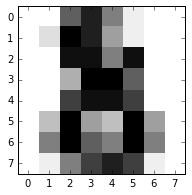

In [33]:
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [36]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [38]:
data, target = digits.data, digits.target
data[-1, :]

array([  0.,   0.,  10.,  14.,   8.,   1.,   0.,   0.,   0.,   2.,  16.,
        14.,   6.,   1.,   0.,   0.,   0.,   0.,  15.,  15.,   8.,  15.,
         0.,   0.,   0.,   0.,   5.,  16.,  16.,  10.,   0.,   0.,   0.,
         0.,  12.,  15.,  15.,  12.,   0.,   0.,   0.,   4.,  16.,   6.,
         4.,  16.,   6.,   0.,   0.,   8.,  16.,  10.,   8.,  16.,   8.,
         0.,   0.,   1.,   8.,  12.,  14.,  12.,   1.,   0.])

In [39]:
target[-1]

8

## UCI CAR Dataset

In [28]:
#shell scripts for downloading the data and placing it in a corresponding directory
!mkdir CAR 
!curl -o CAR/data "http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
!curl -o CAR/description "http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names"
#download the description and display it here.
!cat CAR/description

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 51867  100 51867    0     0  46711      0  0:00:01  0:00:01 --:--:-- 46938
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3097  100  3097    0     0   6923      0 --:--:-- --:--:-- --:--:--  6975
1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78

## Import Data (Text): The 20 newsgroups text dataset 

http://scikit-learn.org/stable/datasets/twenty_newsgroups.html

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of my knowledge, it was originally collected by Ken Lang, probably for his Newsweeder: Learning to filter netnews paper, though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.


The data is organized into 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware / comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale / soc.religion.christian).